In [35]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
plt.style.use('dark_background')

# Error Analysis

In [36]:
error_file = '03.08_14.42'

In [37]:
summary = pd.read_excel(f'../logs/{error_file}.xlsx', sheet_name='summary', index_col=0)
summary

,03.08_14.42
CONSOLIDATE_LABELS,True
CONSOLIDATE_NP_OTHER,True
DATA_AUGMENTATION,NaN
TRAIN_SPLIT_PROP,0.7
PRETRAINED_LM,bert-base-uncased
LOGGING,True
MAX_LENGTH,64
BATCH_SIZE,32
NUM_EPOCHS,20
LEARNING_RATE,0.00002


In [38]:
valid_class_report = pd.read_excel(f'../logs/{error_file}.xlsx', sheet_name='valid_class_report', index_col=0)
valid_class_report = valid_class_report.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
valid_class_report.support = valid_class_report.support.astype(int)

valid_class_report.sort_values(by='f1-score')

,precision,recall,f1-score,support
Other,0.436902,0.519131,0.474480,967
Healthy Living,0.403624,0.623410,0.490000,786
Religion,0.571059,0.597297,0.583884,370
Education,0.679012,0.554156,0.610264,397
Crime,0.601869,0.703057,0.648540,458
Diversity,0.635394,0.663402,0.649096,2246
Environment and Science,0.637620,0.672646,0.654664,892
Business,0.665765,0.712012,0.688112,1382
General News,0.755189,0.693386,0.722969,1784
Wellness,0.859160,0.693461,0.767469,3334


In [39]:
valid_class_report.loc[valid_class_report['f1-score'] < 0.7].sort_values(by='f1-score')

,precision,recall,f1-score,support
Other,0.436902,0.519131,0.474480,967
Healthy Living,0.403624,0.623410,0.490000,786
Religion,0.571059,0.597297,0.583884,370
Education,0.679012,0.554156,0.610264,397
Crime,0.601869,0.703057,0.648540,458
Diversity,0.635394,0.663402,0.649096,2246
Environment and Science,0.637620,0.672646,0.654664,892
Business,0.665765,0.712012,0.688112,1382


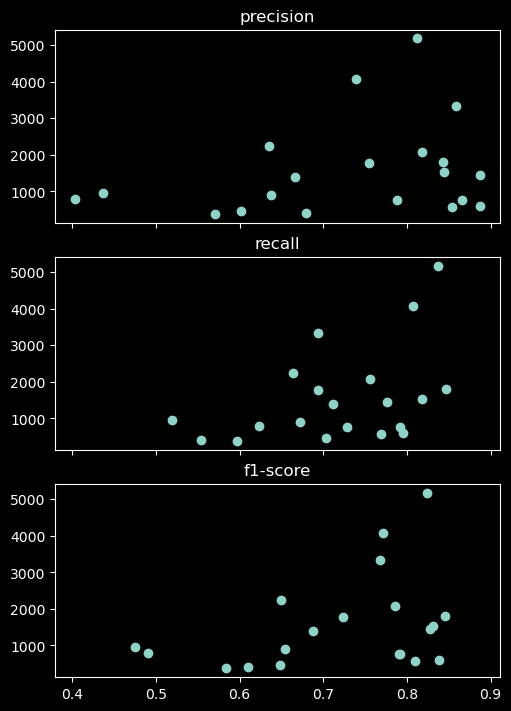

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(5,7), sharey=True, sharex=True, layout = 'constrained')

for ax, metric in zip(axes, ['precision', 'recall', 'f1-score']):
    ax.scatter(valid_class_report[metric], valid_class_report['support'])
    ax.set_title(metric)

plt.show()

# Clustering and Class Refinement

In [41]:
news_clusters = pd.read_csv('../data/processed/news_clustered_classes.csv', index_col=0)
news_clusters.cluster.value_counts(normalize=True)

cluster
1    0.172619
0    0.144296
2    0.123319
6    0.120847
4    0.088668
8    0.088600
5    0.076264
7    0.069506
9    0.066376
3    0.049505
Name: proportion, dtype: float64

In [42]:
print(
    f'Adjusted Rand Index: {metrics.adjusted_rand_score(news_clusters.category, news_clusters.cluster)}\n'
    f'Normalized Mutual Information: {metrics.normalized_mutual_info_score(news_clusters.category, news_clusters.cluster)}\n'
    f'Fowlkes Mallows: {metrics.fowlkes_mallows_score(news_clusters.category, news_clusters.cluster)}'
)

Adjusted Rand Index: 0.047380686445857204
Normalized Mutual Information: 0.10713339893485144
Fowlkes Mallows: 0.13816717495288694


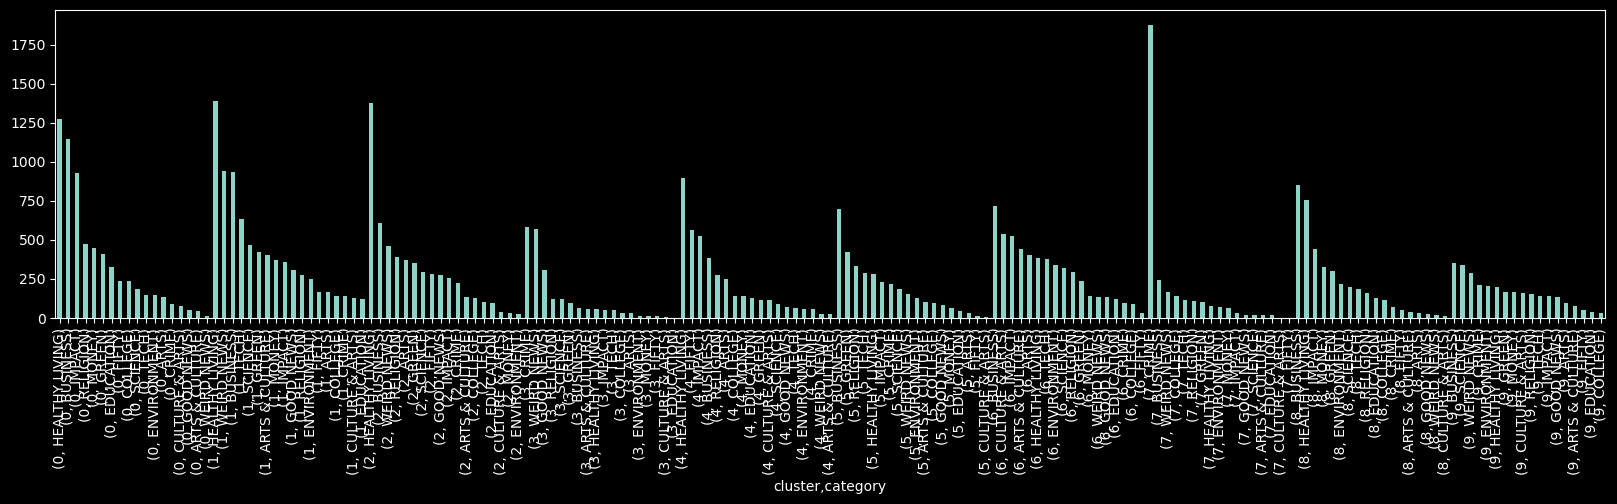

In [43]:
fig, ax = plt.subplots(figsize = (20, 4))
news_clusters.groupby('cluster').category.value_counts().plot(kind='bar')
plt.show()

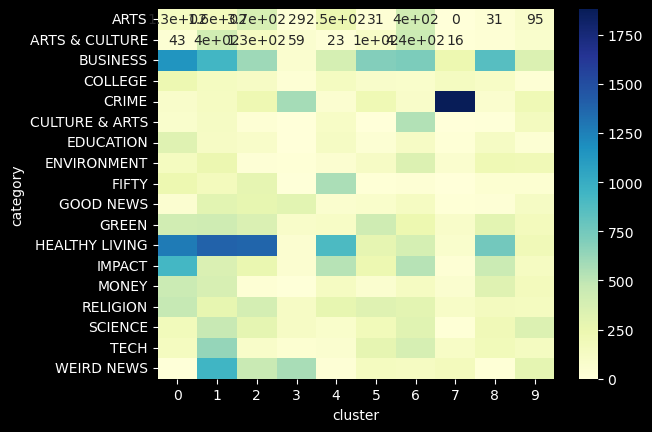

In [44]:
cross_tab = pd.crosstab(news_clusters.category, news_clusters.cluster)
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu")
plt.show()

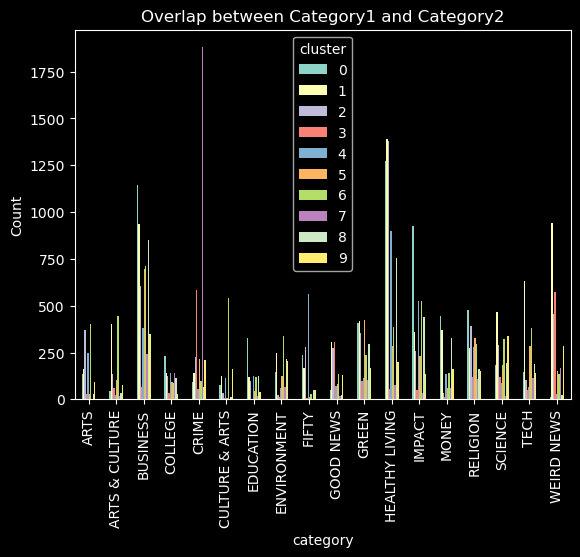

In [45]:
cross_tab.plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Overlap between Category1 and Category2')
plt.show()

# Tuning Results

In [46]:
log_file = '03.05_08.42'
results = pd.read_csv(f'../logs/{log_file}_tuning_results.csv', index_col=0).transpose()
results.transpose()

,03.05_08.44,03.05_10.09,03.05_12.09,03.05_15.16,03.05_17.16,03.05_19.38
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64,64
BATCH_SIZE,32,32,32,64,64,64
NUM_EPOCHS,50,50,50,50,50,50
LEARNING_RATE,2e-06,2e-06,2e-06,2e-06,2e-06,2e-06
DROPOUT,0.3,0.5,0.7,0.3,0.5,0.7
BALANCE_FACTOR,0.1,0.1,0.1,0.1,0.1,0.1
PATIENCE,3,3,3,3,3,3


In [47]:
log_file = '03.05_23.03'
results = pd.read_csv(f'../logs/{log_file}_tuning_results.csv', index_col=0).transpose()
results.transpose()

,03.05_23.04,03.05_23.21,03.05_23.37,03.05_23.53,03.06_00.12,03.06_00.34,03.06_00.53,03.06_01.07,03.06_01.23,03.06_01.39,...,03.06_03.05,03.06_03.25,03.06_03.49,03.06_04.17,03.06_04.42,03.06_04.58,03.06_05.15,03.06_05.35,03.06_05.56,03.06_06.20
TRAIN_SPLIT_PROP,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,...,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.7
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,...,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64,64,64,64,64,64,...,64,64,64,64,64,64,64,64,64,64
BATCH_SIZE,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
NUM_EPOCHS,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05,2e-05,0.0001,0.0001,0.0001,0.0001,...,2e-05,2e-05,2e-05,2e-05,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
DROPOUT,0.1,0.1,0.1,0.3,0.3,0.3,0.1,0.1,0.1,0.3,...,0.1,0.3,0.3,0.3,0.1,0.1,0.1,0.3,0.3,0.3
BALANCE_FACTOR,0.1,0.3,0.5,0.1,0.3,0.5,0.1,0.3,0.5,0.1,...,0.5,0.1,0.3,0.5,0.1,0.3,0.5,0.1,0.3,0.5
PATIENCE,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [48]:
results.sort_values('valid_accuracy', ascending=False).head(5).transpose()

,03.06_03.25,03.06_02.28,03.06_03.49,03.06_03.05,03.06_00.12
TRAIN_SPLIT_PROP,0.7,0.7,0.7,0.7,0.5
PRETRAINED_LM,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased,bert-base-uncased
LOGGING,False,False,False,False,False
MAX_LENGTH,64,64,64,64,64
BATCH_SIZE,32,32,32,32,32
NUM_EPOCHS,50,50,50,50,50
LEARNING_RATE,2e-05,2e-05,2e-05,2e-05,2e-05
DROPOUT,0.3,0.1,0.3,0.1,0.3
BALANCE_FACTOR,0.1,0.1,0.3,0.5,0.3
PATIENCE,3,3,3,3,3


In [49]:
result_cols = [
    'train_accuracy', 'valid_accuracy', 'test_accuracy', 'train_precision', 'valid_precision', 'test_precision', 
    'train_recall', 'valid_recall', 'test_recall', 'train_f1', 'valid_f1', 'test_f1'
]
hyperparam_cols = ['TRAIN_SPLIT_PROP', 'LEARNING_RATE', 'DROPOUT', 'BALANCE_FACTOR']

plot_df = results.filter(hyperparam_cols + result_cols).set_index(hyperparam_cols)

max_train_acc = plot_df.train_accuracy.astype('float').max()
max_valid_acc = plot_df.valid_accuracy.astype('float').max()
max_test_acc = plot_df.test_accuracy.astype('float').max()

max_train_prec = plot_df.train_precision.astype('float').max()
max_valid_prec = plot_df.valid_precision.astype('float').max()
max_test_prec = plot_df.test_precision.astype('float').max()

max_train_rec = plot_df.train_recall.astype('float').max()
max_valid_rec = plot_df.valid_recall.astype('float').max()
max_test_rec = plot_df.test_recall.astype('float').max()

max_train_f1 = plot_df.train_f1.astype('float').max()
max_valid_f1 = plot_df.valid_f1.astype('float').max()
max_test_f1 = plot_df.test_f1.astype('float').max()

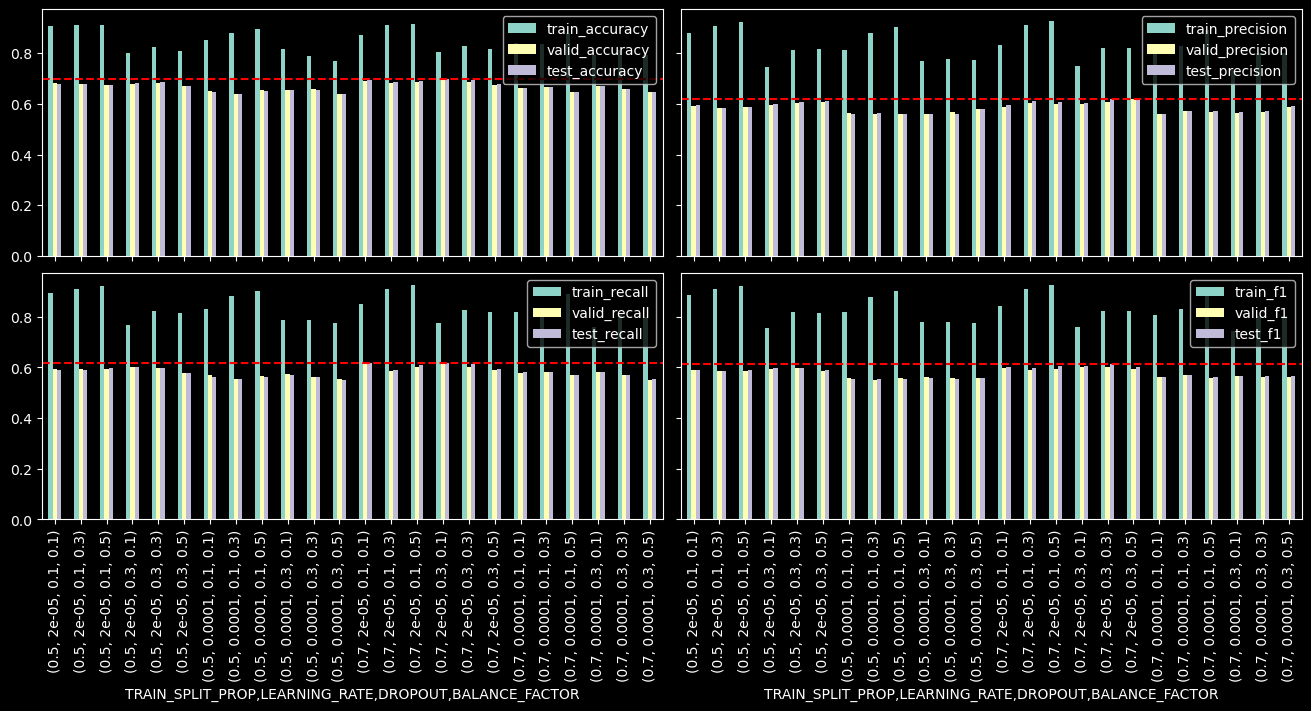

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(13,7), sharey=True, sharex=True, layout = 'constrained')

for ax, metric, max in zip(axes.ravel(), ['accuracy', 'precision', 'recall', 'f1'], [max_test_acc, max_test_prec, max_test_rec, max_test_f1]): 
    plot_df.filter(like=metric, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()

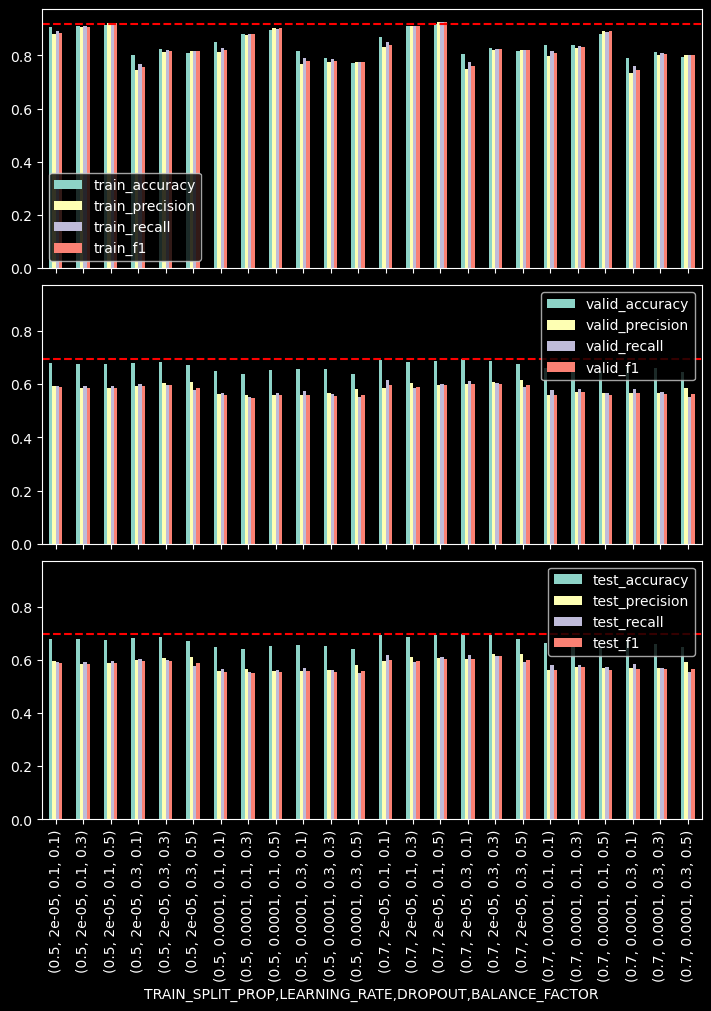

In [51]:
fig, axes = plt.subplots(3, 1, figsize=(7,10), sharey=True, sharex=True, layout = 'constrained')

for ax, subset, max in zip(axes, ['train', 'valid', 'test'], [max_train_acc, max_valid_acc, max_test_acc]): 
    plot_df.filter(like=subset, axis=1).astype('float').plot(kind='bar', ax=ax)
    ax.axhline(y=max, color='r', linestyle='--')

plt.show()